# Load Libraries

## Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis)

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
sns.set(color_codes=True)

We are going to load a necessary libraries

In [44]:
df=pd.read_csv("C:\DataScience\Dataset\EDA\healthcare_dataset.csv")
print(df.to_string())

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\aswin\AppData\Local\Temp\ipykernel_13820\4074351472.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("C:\DataScience\Dataset\EDA\healthcare_dataset.csv")


                           Name  Age  Gender Blood Type Medical Condition Date of Admission                      Doctor                            Hospital Insurance Provider  Billing Amount  Room Number Admission Type Discharge Date   Medication  Test Results
0               Tiffany Ramirez   81  Female         O-          Diabetes        2022-11-17              Patrick Parker                    Wallace-Hamilton           Medicare    37490.983364          146       Elective     2022-12-01      Aspirin  Inconclusive
1                   Ruben Burns   35    Male         O+            Asthma        2023-06-01               Diane Jackson           Burke, Griffin and Cooper   UnitedHealthcare    47304.064845          404      Emergency     2023-06-15      Lipitor        Normal
2                     Chad Byrd   61    Male         B-           Obesity        2019-01-09                  Paul Baker                          Walton LLC           Medicare    36874.896997          292      Emergenc

## Load head

In [46]:
print(df.head(5))

                  Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Eme

## Load tail

In [47]:
print(df.tail(5))

                      Name  Age  Gender Blood Type Medical Condition  \
9995            James Hood   83    Male         A+           Obesity   
9996       Stephanie Evans   47  Female        AB+         Arthritis   
9997  Christopher Martinez   54    Male         B-         Arthritis   
9998           Amanda Duke   84    Male         A+         Arthritis   
9999             Eric King   20    Male         B-         Arthritis   

     Date of Admission             Doctor                   Hospital  \
9995        2022-07-29       Samuel Moody   Wood, Martin and Simmons   
9996        2022-01-06  Christopher Yates               Nash-Krueger   
9997        2022-07-01   Robert Nicholson            Larson and Sons   
9998        2020-02-06        Jamie Lewis               Wilson-Lyons   
9999        2023-03-22        Tasha Avila  Torres, Young and Stewart   

     Insurance Provider  Billing Amount  Room Number Admission Type  \
9995   UnitedHealthcare    39606.840083          110       Elec

## Loading Datatypes

In [48]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

## Load Columns

In [49]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

##Load Info

loading info

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

#Date of admission and discharge date have dtype as object so format it to datetime

In [51]:
for date in ['Date of Admission','Discharge Date']:
    df[date]=pd.to_datetime(df[date])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

#calculating the number of days patients got admitted in Hospital

In [53]:
df['Days Hospitalized'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df['Days Hospitalized'] = df['Days Hospitalized'].astype(int)
df['Days Hospitalized']

0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: Days Hospitalized, Length: 10000, dtype: int32

Here we are dropping irrelevent column

In [54]:
df=df.drop(['Name','Room Number','Date of Admission','Discharge Date'],axis=1)
df.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Days Hospitalized
0,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


## Renaming the column

In [55]:
for i in df:
    j=i.replace(" ","_")
    df.rename(columns={i:j.capitalize()},inplace=True)
df.head(5)

,Age,Gender,Blood_type,Medical_condition,Doctor,Hospital,Insurance_provider,Billing_amount,Admission_type,Medication,Test_results,Days_hospitalized
0,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


## Null values

In [56]:
df.isnull().sum()

Age                   0
Gender                0
Blood_type            0
Medical_condition     0
Doctor                0
Hospital              0
Insurance_provider    0
Billing_amount        0
Admission_type        0
Medication            0
Test_results          0
Days_hospitalized     0
dtype: int64

In [57]:
df.shape

(10000, 12)

#count() : Used to count  number of rows

In [58]:
df.count()

Age                   10000
Gender                10000
Blood_type            10000
Medical_condition     10000
Doctor                10000
Hospital              10000
Insurance_provider    10000
Billing_amount        10000
Admission_type        10000
Medication            10000
Test_results          10000
Days_hospitalized     10000
dtype: int64

Unique Values

#Number of unique values of the column

In [59]:
df.nunique()

Age                      68
Gender                    2
Blood_type                8
Medical_condition         6
Doctor                 9416
Hospital               8639
Insurance_provider        5
Billing_amount        10000
Admission_type            3
Medication                5
Test_results              3
Days_hospitalized        30
dtype: int64

## Data Exlporation And Visualization

The code uses a for loop to iterate over each column in the DataFrame. If the column's data type is object and the column is not 'Doctor' or 'Hospital', it prints the value counts of the column.

In [60]:
#using for loop to find the distribution of data for categorical columns
for col in df.columns:
    if df[col].dtype == 'object' and col!= 'Doctor' and col!= 'Hospital':
        print(df[col].value_counts())
        print('--')

Gender
Female    5075
Male      4925
Name: count, dtype: int64
--
Blood_type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64
--
Medical_condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64
--
Insurance_provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64
--
Admission_type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64
--
Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64
--
Test_results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64
--


In [61]:
#To print it in percentage
for col in df.columns:
    if df[col].dtype == 'object' and col!= 'Doctor' and col!= 'Hospital':
        total = len(df[col])
        value_counts = df[col].value_counts(normalize=True)
        print(f"{col}:\n")
        for value, count in value_counts.items():
            print(f"{value}: {count*100:.2f}%")
        print('--')

Gender:

Female: 50.75%
Male: 49.25%
--
Blood_type:

AB-: 12.75%
AB+: 12.58%
B-: 12.52%
O+: 12.48%
O-: 12.44%
B+: 12.44%
A+: 12.41%
A-: 12.38%
--
Medical_condition:

Asthma: 17.08%
Cancer: 17.03%
Hypertension: 16.88%
Arthritis: 16.50%
Obesity: 16.28%
Diabetes: 16.23%
--
Insurance_provider:

Cigna: 20.40%
Blue Cross: 20.32%
Aetna: 20.25%
UnitedHealthcare: 19.78%
Medicare: 19.25%
--
Admission_type:

Urgent: 33.91%
Emergency: 33.67%
Elective: 32.42%
--
Medication:

Penicillin: 20.79%
Lipitor: 20.15%
Ibuprofen: 19.76%
Aspirin: 19.68%
Paracetamol: 19.62%
--
Test_results:

Abnormal: 34.56%
Inconclusive: 32.77%
Normal: 32.67%
--


## Plotting Histogram

### To Find the frequency of the numeric columns

____________________________________________________________________________________________________


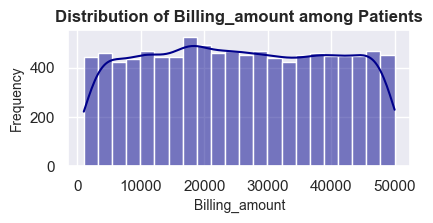

____________________________________________________________________________________________________


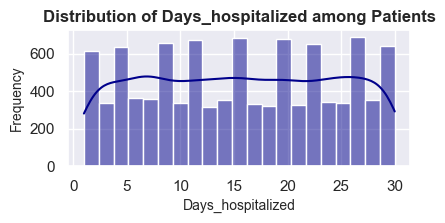

In [62]:
#To Find the frequency of the numeric columns
for col in df.columns:
    if df[col].dtype == 'int' or df[col].dtype == 'float':
        plt.figure(figsize = (15,6))
        plt.style.use('seaborn-v0_8-dark-palette')
        plt.subplot(3,3,3)
        sns.histplot(df[col],kde = True,color = 'darkblue')
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel(col,fontsize = 10)
        plt.title(f'Distribution of {col} among Patients',fontsize = 12,weight = 'bold')
        print("_"*100)
        plt.show()

## Plotting Pie chart and Bar chart to find the Data Distribution for Categorical Columns

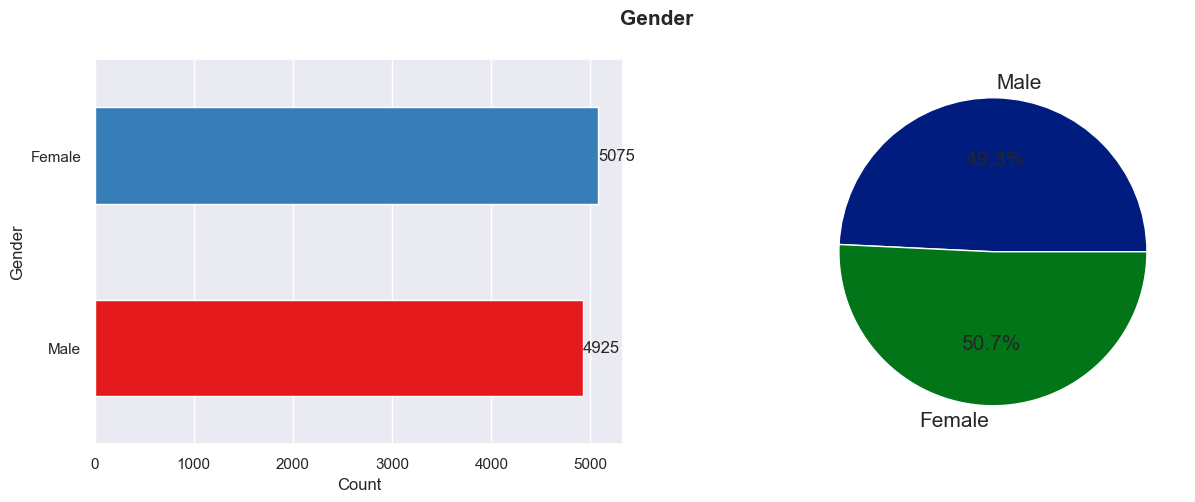

____________________________________________________________________________________________________




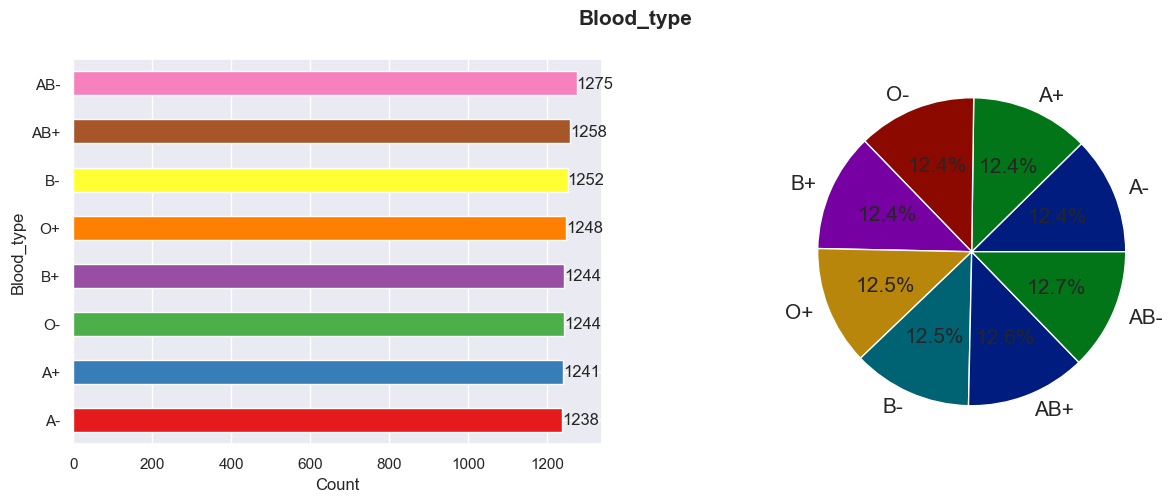

____________________________________________________________________________________________________




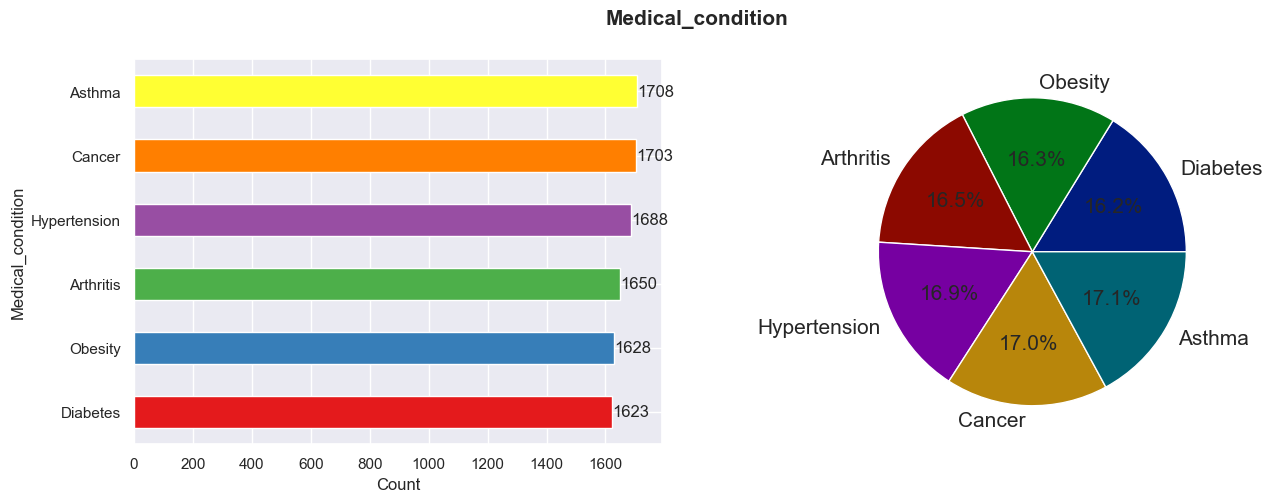

____________________________________________________________________________________________________




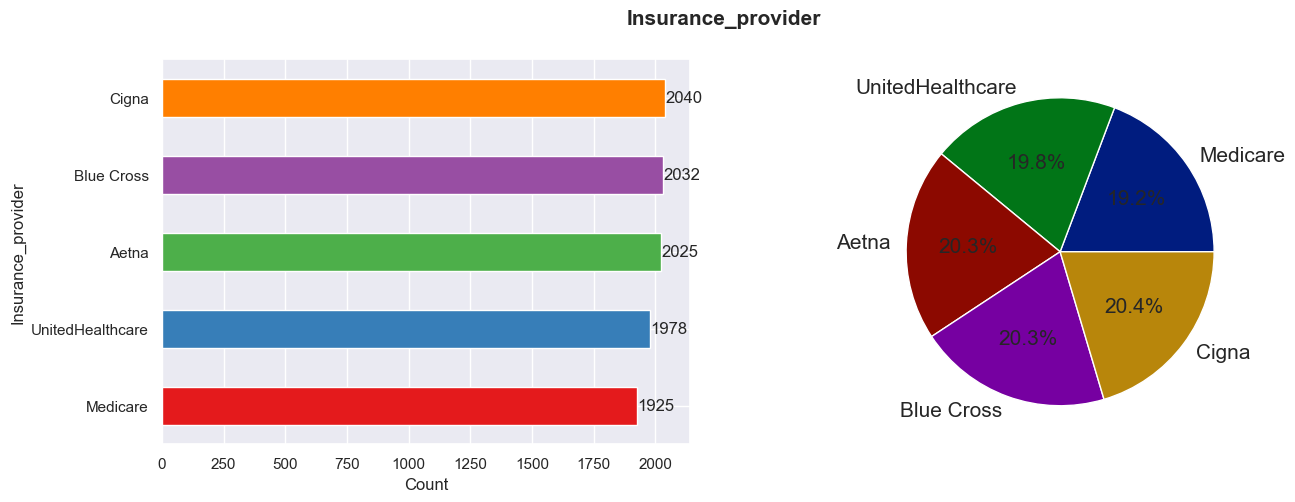

____________________________________________________________________________________________________




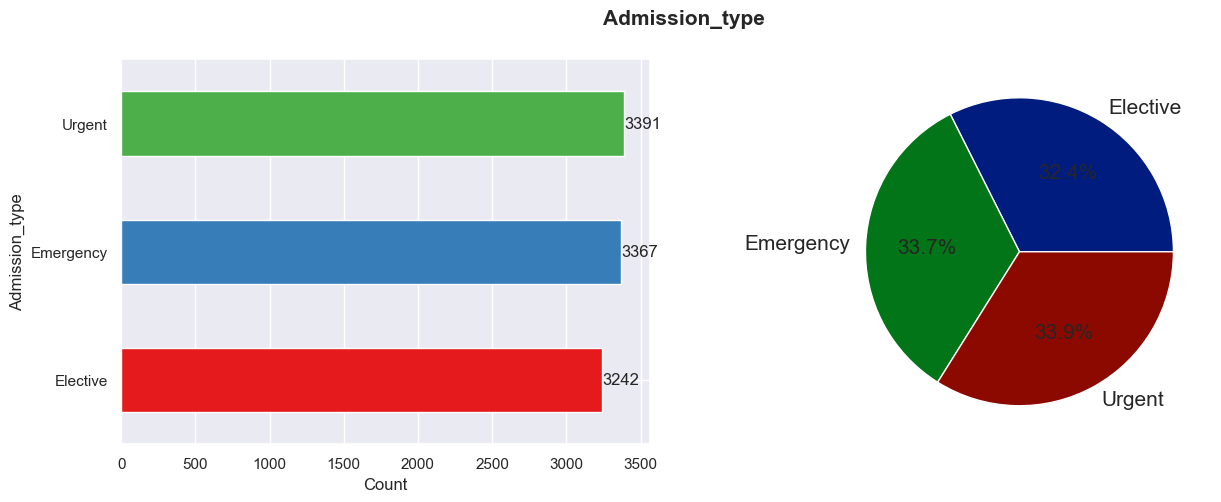

____________________________________________________________________________________________________




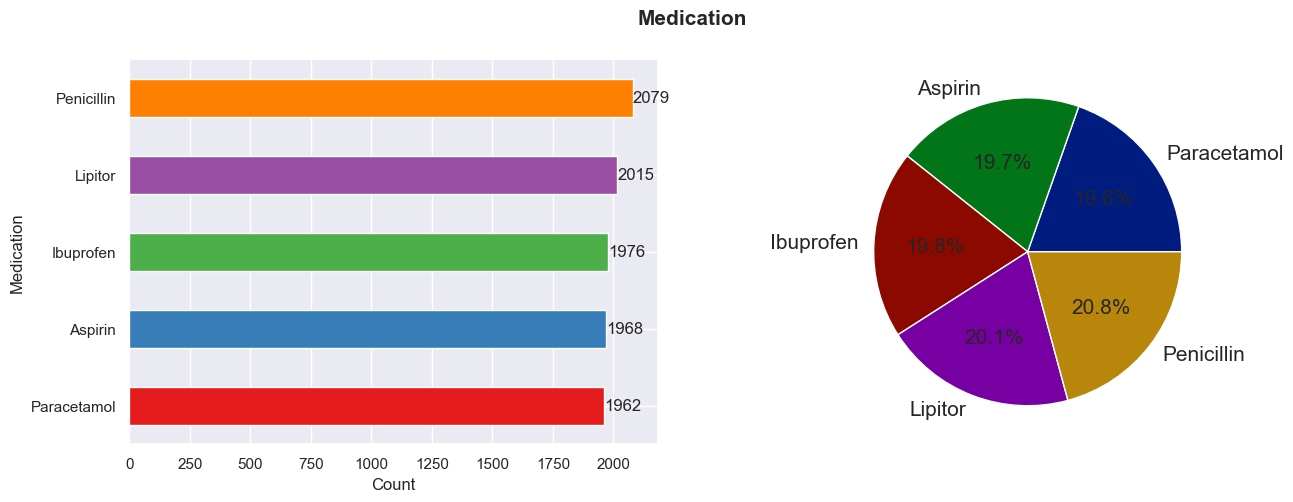

____________________________________________________________________________________________________




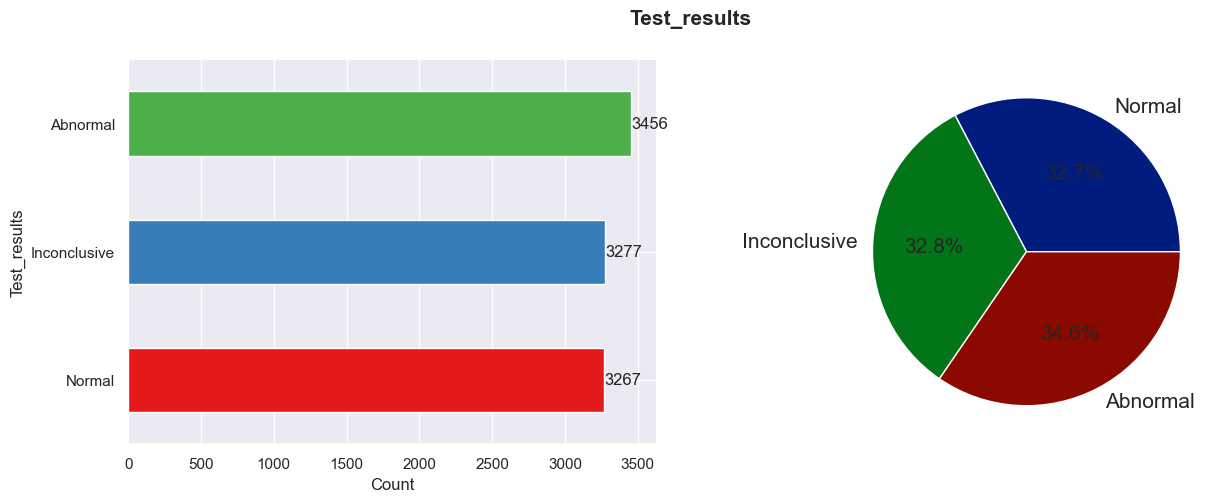

____________________________________________________________________________________________________


In [64]:
#using for loop for visualization of data in categorical columns
for col in df.columns:
    if df[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print('\n')
        fig,ax = plt.subplots(1,2,figsize = (15,5))
        fig.suptitle(col,fontsize = 15,weight = 'bold')
        plt.subplot(1,2,1)
        category_count = df[col].value_counts().sort_values()
        category_count.plot(kind = 'barh',color= plt.cm.Set1.colors)
        for index,value in enumerate(category_count):
            plt.text(value,index,str(value),fontsize = 12,va = 'center')
        plt.xlabel('Count')
        plt.subplot(1,2,2)
        category_count.plot(kind = 'pie',
               labels = category_count.index,
               autopct = '%1.1f%%',
               textprops = {'fontsize':15})
        plt.ylabel('')
        plt.show()
        print("_"*100)

## Distribution of Medical Condtions between Genders

In [67]:
#unstack function converts the data into 2 dimensional
gender_medical = df.groupby(['Medical_condition','Gender']).size().sort_values().unstack()
gender_medical

Gender,Female,Male
Medical_condition,,
Arthritis,815,835
Asthma,874,834
Cancer,887,816
Diabetes,825,798
Hypertension,836,852
Obesity,838,790


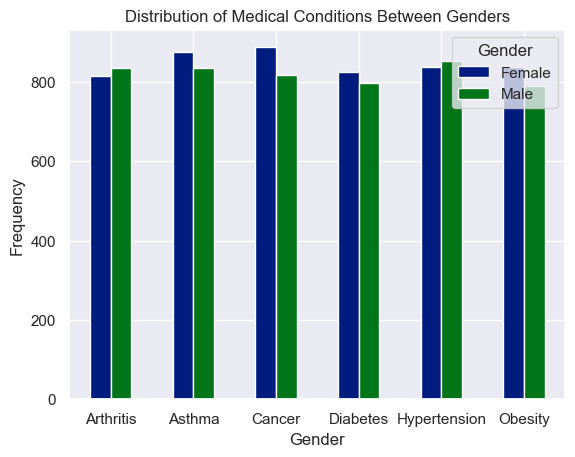

In [68]:
gender_medical.plot(kind = 'bar')
plt.title('Distribution of Medical Conditions Between Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

Female have higher share in majority of the medical conditions. Cancer is leading medical condition among female whereas Hypertension is leading cause among male.

#


## Correlation between Age,Billing_amount and Days_hospitalized

In [74]:
# selecting the columns to correlate
correlation_columns = ['Age','Billing_amount','Days_hospitalized']
# creating a df using the above columns
correlate_df = df[correlation_columns]
#encoding categorical columns for correlation
correlate_df['Gender'] = df['Gender'].astype('category').cat.codes
correlate_df['Admission_type'] = df['Admission_type'].astype('category').cat.codes
correlate_df['Test_results'] = df['Test_results'].astype('category').cat.codes
# creating correlation matrix
correlation_matrix = correlate_df.corr()
correlation_matrix

C:\Users\aswin\AppData\Local\Temp\ipykernel_13820\534081462.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlate_df['Gender'] = df['Gender'].astype('category').cat.codes
C:\Users\aswin\AppData\Local\Temp\ipykernel_13820\534081462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlate_df['Admission_type'] = df['Admission_type'].astype('category').cat.codes
C:\Users\aswin\AppData\Local\Temp\ipykernel_13820\534081462.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,Age,Billing_amount,Days_hospitalized,Gender,Admission_type,Test_results
Age,1.000000,-0.009483,0.009111,-0.008099,0.003233,0.008747
Billing_amount,-0.009483,1.000000,-0.013507,0.002340,0.002531,-0.005844
Days_hospitalized,0.009111,-0.013507,1.000000,-0.006361,-0.005942,-0.008228
Gender,-0.008099,0.002340,-0.006361,1.000000,-0.004515,-0.010472
Admission_type,0.003233,0.002531,-0.005942,-0.004515,1.000000,-0.010964
Test_results,0.008747,-0.005844,-0.008228,-0.010472,-0.010964,1.000000


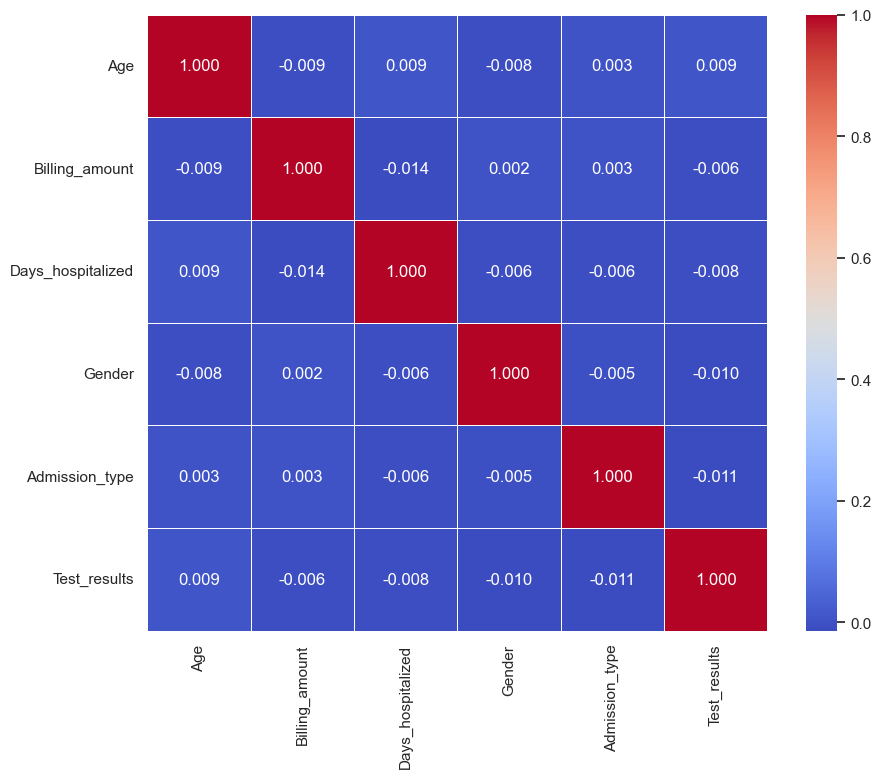

In [75]:
#plotting correlation matrix using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.3f',linewidths = 0.5)
plt.show()

## Explanation

-There is a slight correlation between age and test results. Even there is a positive correlation between age and days hospitalized. There is a negative correlation between age and billing amount.
-Biling amount has negative correlation with test results and days hospitalized. Billing amount has a positive correlation with admission type and gender.                        
-Days hospitalized has negative correlation with every attribute except age.                                                                                                      
-Except for billing amount attribute, gender has a negative correlation with all other attributes.                                                                                
-Admission type and test results have a negative correlation.

# 

# Total billing amount for top 10 Hospitals

In [77]:
# Grouping data by hospital and calculating the average billing amount
top10_hospital_billing = df.groupby(['Hospital'])['Billing_amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_hospital_billing

,Hospital,Billing_amount
0,Smith and Sons,477638.881124
1,Smith PLC,432283.548554
2,Smith Ltd,428163.073062
3,Smith Inc,351463.888372
4,Williams LLC,327522.472644
5,Thomas Group,327045.374505
6,Johnson Ltd,305971.192470
7,Davis and Sons,293452.520353
8,Jones Inc,290351.193848
9,Brown LLC,284695.674489


C:\Users\aswin\AppData\Local\Temp\ipykernel_13820\733365696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top10_hospital_billing['Billing_amount'],


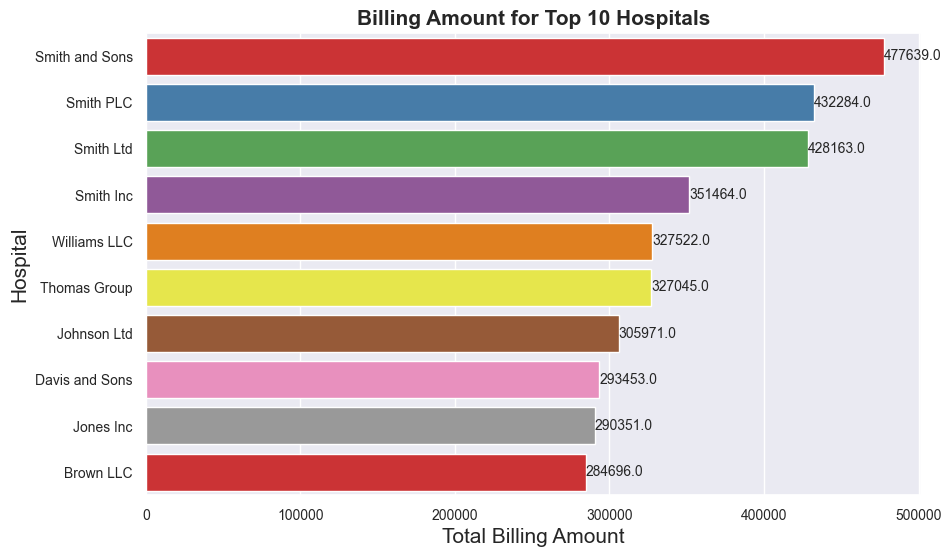

In [79]:
# plot bar graph to find the top 10 hospitals by billing
plt.figure(figsize=(10,6))
sns.barplot(x= top10_hospital_billing['Billing_amount'],
            y= top10_hospital_billing['Hospital'],
            palette="Set1")
for index,value in enumerate(top10_hospital_billing['Billing_amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Hospital',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Hospitals',fontsize = 15, weight = 'bold')
plt.show()

Smith and Sons has the highest average billing amount of 477639.

#

# Top 20 Doctors by Billing amount

In [80]:
# Grouping data by doctors and calculating the sum of billing amount
top20_doctors_billing = df.groupby(['Doctor'])['Billing_amount'].sum().sort_values(ascending = False)[:20].reset_index()
top20_doctors_billing

,Doctor,Billing_amount
0,Michael Johnson,181576.474893
1,Christopher Davis,159763.924755
2,Jennifer Smith,149972.685230
3,Robert Brown,147747.938399
4,Angela Jones,141867.200639
5,Robert Miller,129493.950567
6,John Jones,127864.878980
7,Leslie Jones,123228.453342
8,Jessica Johnson,122383.408771
9,Daniel Smith,121830.506139


C:\Users\aswin\AppData\Local\Temp\ipykernel_13820\1961445779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top20_doctors_billing['Billing_amount'],


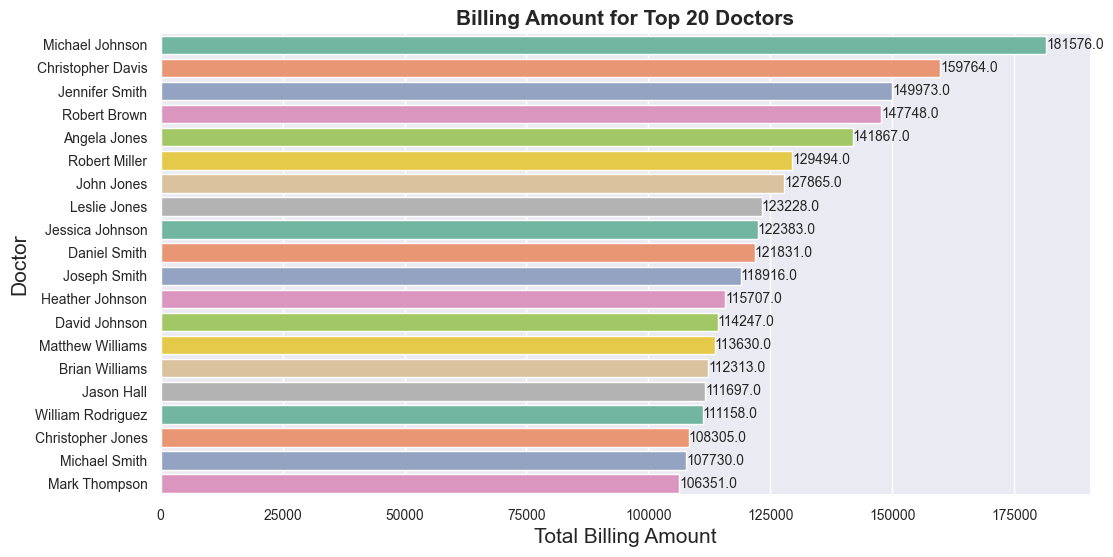

In [81]:
# plot bar graph to find the top 20 doctors by billing
plt.figure(figsize=(12,6))
sns.barplot(x= top20_doctors_billing['Billing_amount'],
            y= top20_doctors_billing['Doctor'],
            palette="Set2")
for index,value in enumerate(top20_doctors_billing['Billing_amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 20 Doctors',fontsize = 15, weight = 'bold')
plt.show()

Doctor Michael Johnson is the top doctor with a total billing amount of 181576.

#

## Medical Condition generated the Highest average Billing among Male and Female

In [82]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = df.groupby(['Medical_condition','Gender'])[['Billing_amount']].mean().reset_index()
medical_gender_billing

,Medical_condition,Gender,Billing_amount
0,Arthritis,Female,24692.417417
1,Arthritis,Male,25670.983684
2,Asthma,Female,25672.743141
3,Asthma,Male,25148.724551
4,Cancer,Female,25370.465132
5,Cancer,Male,25722.399683
6,Diabetes,Female,26369.383481
7,Diabetes,Male,25740.384845
8,Hypertension,Female,25126.230138
9,Hypertension,Male,25268.489378


C:\Users\aswin\AppData\Local\Temp\ipykernel_13820\1183064490.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x= medical_gender_billing['Medical_condition'],


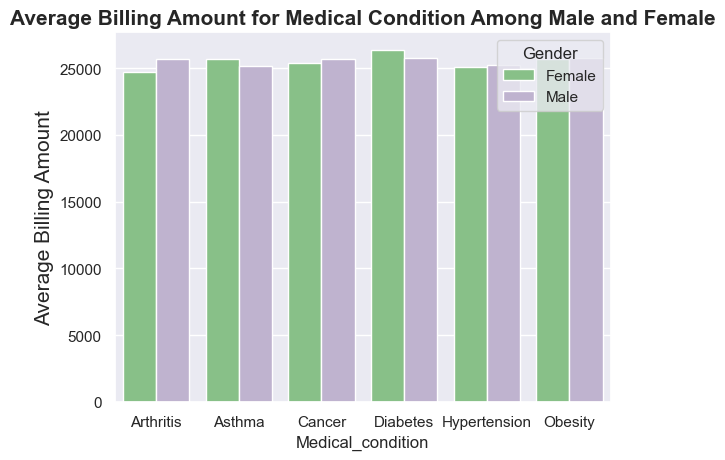

In [83]:
# plot bar graph to find the average billing amount for medical condition among male and female
sns.barplot(x= medical_gender_billing['Medical_condition'],
            y= medical_gender_billing['Billing_amount'],
            hue = medical_gender_billing['Gender'],ci = None,
            palette="Accent")
# Adding labels and title
plt.ylabel('Average Billing Amount',fontsize = 15)
plt.title('Average Billing Amount for Medical Condition Among Male and Female',fontsize = 15, weight = 'bold')
plt.show()

## Distribution of different Age groups

In [84]:
min_age = df['Age'].min()
max_age = df['Age'].max()
print(min_age,",",max_age)

18 , 85


In [85]:
df['Age_Group'] = pd.cut(df['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
                                labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = False)
Age_group = df['Age_Group'].value_counts().sort_values(ascending = False)
Age_group

Age_Group
18-30      1774
71-80      1523
51-60      1521
31-40      1495
61-70      1467
41-50      1397
Over 80     823
Name: count, dtype: int64

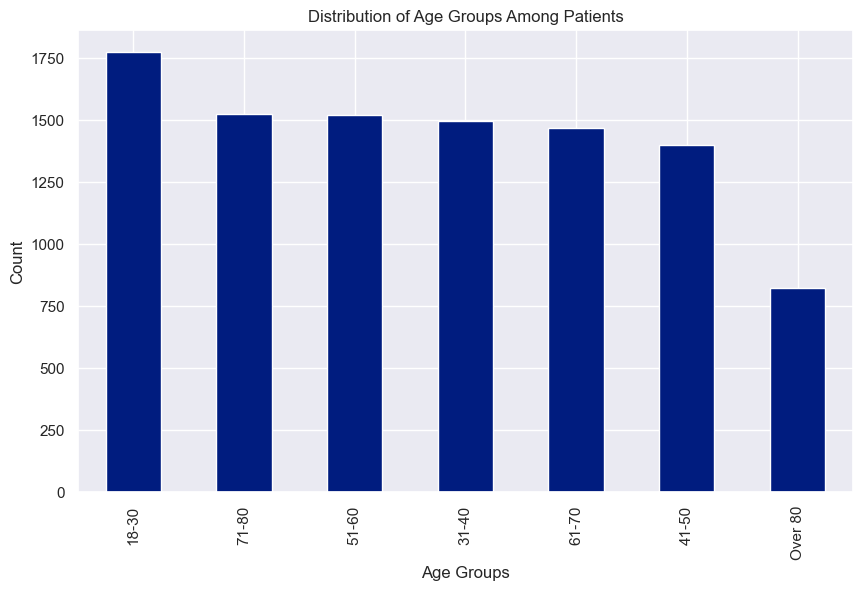

In [86]:
plt.figure(figsize=(10,6))
Age_group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

## Explanation

The maximum number of patients are in the range of 18-30.

#

# CONCLUSION

    - Compared to male, there are high female patients.
    - Most patients have the blood type of AB-.
    - Asthma is the major medical condition among patients.
    - Cigna is the leading insurance provider.
    - Pencilin is the most prescribed medication.